#                                                Data Analysis
#### Vanessa Kamunya


In [1]:
import os
import numpy as np
import pandas as pd

# Data wrangling 

In [2]:
data = pd.read_csv('KCSE_2016.csv') # read in data
data['Year'] = data.Gender.str.extract('(\d\d\d\d)', expand=True) # exctract using regex expressions
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['gender'] = data.Gender.str.extract('(\w*)', expand=True)
data['gender'] = data.gender.str.replace('FEMLAE', 'FEMALE') # correcting a typo
data['Total'] = data.sum(axis=1)
data['public_campus'] = data.loc[:,'A':'C+'].sum(axis=1)
data = data.drop(columns=['Gender']) # dropping unnecessary column
data = data[["Year","gender","Total","public_campus","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"]]
display(data)

C:\Users\user\AppData\Local\Temp/ipykernel_41508/49798464.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Total'] = data.sum(axis=1)


,Year,gender,Total,public_campus,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,2016-01-01,FEMALE,299198,50415,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,2016-01-01,MALE,271893,38514,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,2016-01-01,ALL,571161,88929,141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,2015-01-01,MALE,278387,98187,2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,2015-01-01,FEMALE,242853,71305,661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223
5,2015-01-01,ALL,521240,169492,2685,12069,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350
6,2006-01-01,MALE,24746,8285,148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834
7,2006-01-01,FEMALE,21221,4636,69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897
8,2006-01-01,ALL,45967,12921,217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731
9,2007-01-01,MALE,26410,8732,110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779


In [3]:
print(f'Number of rows and columns: {data.shape}') # number of rows and columns
print(f'Name of coulmns: {data.columns.to_list()}') # name of columns
print(data.dtypes) # type of data

Number of rows and columns: (21, 16)
Name of coulmns: ['Year', 'gender', 'Total', 'public_campus', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
Year             datetime64[ns]
gender                   object
Total                     int64
public_campus             int64
A                         int64
A-                        int64
B+                        int64
B                         int64
B-                        int64
C+                        int64
C                         int64
C-                        int64
D+                        int64
D                         int64
D-                        int64
E                         int64
dtype: object


In [4]:
print(data.Year.sort_values().value_counts()) # how many times this year occured in the dataset
print(data.gender.sort_values().value_counts()) # how genders were distributed

2006-01-01    3
2007-01-01    3
2008-01-01    3
2009-01-01    3
2010-01-01    3
2015-01-01    3
2016-01-01    3
Name: Year, dtype: int64
ALL       7
FEMALE    7
MALE      7
Name: gender, dtype: int64


In [5]:
data.describe()

,Total,public_campus,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,130117.428571,31935.238095,366.285714,2038.285714,4067.047619,6222.095238,8427.142857,10814.380952,13588.190476,16503.904762,19132.761905,22094.190476,22104.857143,4758.285714
std,168107.029774,42322.357771,681.671559,2987.416779,5483.405652,8378.130101,11152.139661,13835.542810,17009.456439,20674.791950,24545.371739,30498.088459,36993.180127,8006.831415
min,21221.000000,4636.000000,50.000000,191.000000,446.000000,772.000000,1234.000000,1873.000000,2554.000000,3193.000000,3418.000000,3291.000000,2635.000000,779.000000
25%,27159.000000,8285.000000,83.000000,563.000000,1159.000000,1627.000000,2108.000000,2722.000000,3314.000000,3824.000000,4043.000000,4150.000000,3593.000000,1304.000000
50%,45967.000000,12921.000000,141.000000,846.000000,1641.000000,2458.000000,3342.000000,4442.000000,5538.000000,6492.000000,6937.000000,6804.000000,5544.000000,1569.000000
75%,242853.000000,38514.000000,196.000000,1960.000000,4394.000000,7012.000000,10096.000000,14969.000000,21832.000000,30047.000000,38976.000000,39113.000000,23127.000000,2755.000000
max,571161.000000,169492.000000,2685.000000,12069.000000,21927.000000,33460.000000,44581.000000,54770.000000,64913.000000,74115.000000,80951.000000,112135.000000,149929.000000,33399.000000


In [6]:
stat = data.describe() # basic statistics
stat.loc['range'] = stat.loc['max'] - stat.loc['min']
out_fields = ['mean','std','25%','50%','75%', 'range'] # important rows for us
stat = stat.loc[out_fields]
stat.rename({'50%': 'median'}, inplace=True)
display(stat)

,Total,public_campus,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
mean,130117.428571,31935.238095,366.285714,2038.285714,4067.047619,6222.095238,8427.142857,10814.380952,13588.190476,16503.904762,19132.761905,22094.190476,22104.857143,4758.285714
std,168107.029774,42322.357771,681.671559,2987.416779,5483.405652,8378.130101,11152.139661,13835.542810,17009.456439,20674.791950,24545.371739,30498.088459,36993.180127,8006.831415
25%,27159.000000,8285.000000,83.000000,563.000000,1159.000000,1627.000000,2108.000000,2722.000000,3314.000000,3824.000000,4043.000000,4150.000000,3593.000000,1304.000000
median,45967.000000,12921.000000,141.000000,846.000000,1641.000000,2458.000000,3342.000000,4442.000000,5538.000000,6492.000000,6937.000000,6804.000000,5544.000000,1569.000000
75%,242853.000000,38514.000000,196.000000,1960.000000,4394.000000,7012.000000,10096.000000,14969.000000,21832.000000,30047.000000,38976.000000,39113.000000,23127.000000,2755.000000
range,549940.000000,164856.000000,2635.000000,11878.000000,21481.000000,32688.000000,43347.000000,52897.000000,62359.000000,70922.000000,77533.000000,108844.000000,147294.000000,32620.000000


# Using Aggregation functions to study Mean, Median and Max by Year by Gender

In [7]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'Year' and field != 'gender'} # select only columns with numberic values 
agg_dict['C+'] = ['max', 'mean']
agg_dict['A'] = ['max', 'mean']
pprint(agg_dict)
data.groupby(['Year','gender']).agg(agg_dict)

{'A': ['max', 'mean'],
 'A-': ['mean', 'median'],
 'B': ['mean', 'median'],
 'B+': ['mean', 'median'],
 'B-': ['mean', 'median'],
 'C': ['mean', 'median'],
 'C+': ['max', 'mean'],
 'C-': ['mean', 'median'],
 'D': ['mean', 'median'],
 'D+': ['mean', 'median'],
 'D-': ['mean', 'median'],
 'E': ['mean', 'median'],
 'Total': ['mean', 'median'],
 'public_campus': ['mean', 'median']}


Total           public_campus               A          \
                       mean    median          mean    median   max    mean   
Year       gender                                                             
2006-01-01 ALL      45967.0   45967.0       12921.0   12921.0   217   217.0   
           FEMALE   21221.0   21221.0        4636.0    4636.0    69    69.0   
           MALE     24746.0   24746.0        8285.0    8285.0   148   148.0   
2007-01-01 ALL      48972.0   48972.0       13729.0   13729.0   160   160.0   
           FEMALE   22562.0   22562.0        4997.0    4997.0    50    50.0   
           MALE     26410.0   26410.0        8732.0    8732.0   110   110.0   
2008-01-01 ALL      54728.0   54728.0       15013.0   15013.0   168   168.0   
           FEMALE   25128.0   25128.0        5402.0    5402.0    66    66.0   
           MALE     29600.0   29600.0        9611.0    9611.0   102   102.0   
2009-01-01 ALL      59251.0   59251.0       16183.0   16183.0   196   196.0   
           FEMALE   27159.0   27159.0        5763.0    5763.0    58    58.0   
           MALE     32092.0   32092.0       10420.0   10420.0   138   138.0   
2010-01-01 ALL      64949.0   64949.0       19053.0   19053.0   279   279.0   
           FEMALE   29846.0   29846.0        7001.0    7001.0    97    97.0   
           MALE     35103.0   35103.0       12052.0   12052.0   182   182.0   
2015-01-01 ALL     521240.0  521240.0      169492.0  169492.0  2685  2685.0   
           FEMALE  242853.0  242853.0       71305.0   71305.0   661   661.0   
           MALE    278387.0  278387.0       98187.0   98187.0  2024  2024.0   
2016-01-01 ALL     571161.0  571161.0       88929.0   88929.0   141   141.0   
           FEMALE  299198.0  299198.0       50415.0   50415.0    58    58.0   
           MALE    271893.0  271893.0       38514.0   38514.0    83    83.0   

                        A-                B+           ...       C-           \
                      mean   median     mean   median  ...     mean   median   
Year       gender                                      ...                     
2006-01-01 ALL       880.0    880.0   1641.0   1641.0  ...   6492.0   6492.0   
           FEMALE    242.0    242.0    446.0    446.0  ...   3193.0   3193.0   
           MALE      638.0    638.0   1195.0   1195.0  ...   3299.0   3299.0   
2007-01-01 ALL       754.0    754.0   1632.0   1632.0  ...   7048.0   7048.0   
           FEMALE    191.0    191.0    473.0    473.0  ...   3439.0   3439.0   
           MALE      563.0    563.0   1159.0   1159.0  ...   3609.0   3609.0   
2008-01-01 ALL       972.0    972.0   2009.0   2009.0  ...   7442.0   7442.0   
           FEMALE    274.0    274.0    596.0    596.0  ...   3618.0   3618.0   
           MALE      698.0    698.0   1413.0   1413.0  ...   3824.0   3824.0   
2009-01-01 ALL       846.0    846.0   1989.0   1989.0  ...   8243.0   8243.0   
           FEMALE    218.0    218.0    553.0    553.0  ...   3996.0   3996.0   
           MALE      628.0    628.0   1436.0   1436.0  ...   4247.0   4247.0   
2010-01-01 ALL      1236.0   1236.0   2531.0   2531.0  ...   8925.0   8925.0   
           FEMALE    344.0    344.0    744.0    744.0  ...   4389.0   4389.0   
           MALE      892.0    892.0   1787.0   1787.0  ...   4536.0   4536.0   
2015-01-01 ALL     12069.0  12069.0  21927.0  21927.0  ...  74115.0  74115.0   
           FEMALE   4117.0   4117.0   8410.0   8410.0  ...  36633.0  36633.0   
           MALE     7952.0   7952.0  13517.0  13517.0  ...  37482.0  37482.0   
2016-01-01 ALL      4645.0   4645.0  10975.0  10975.0  ...  61026.0  61026.0   
           FEMALE   2685.0   2685.0   6581.0   6581.0  ...  30979.0  30979.0   
           MALE     1960.0   1960.0   4394.0   4394.0  ...  30047.0  30047.0   

                        D+                  D                  D-            \
                      mean   median      mean    median      mean    median   
Year       gender                             

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

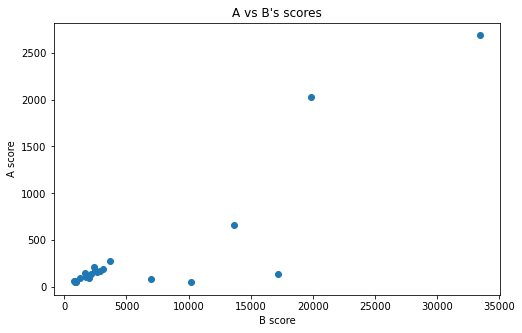

In [9]:
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.scatter(data.B, data.A)
ax.set(xlabel='B score',
       ylabel='A score',
       title='A vs B\'s scores');

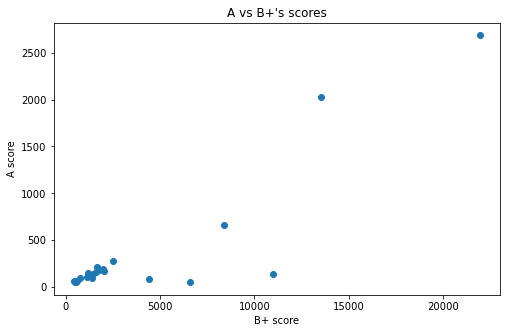

In [10]:
# This is a scatter plot shows that there is a positive correlation between B+ and A's scores.
plt.figure(figsize=(8,5))
ax = plt.axes()

ax.scatter(data['B+'], data.A)

ax.set(xlabel='B+ score',
       ylabel='A score',
       title='A vs B+\'s scores');

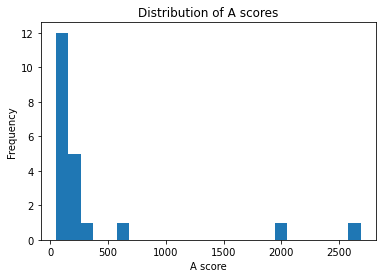

In [11]:
# Histogram that shows A's score distribution
ax = data.A.plot.hist(bins=25)

ax.set(xlabel='A score', 
       ylabel='Frequency',
       title='Distribution of A scores');

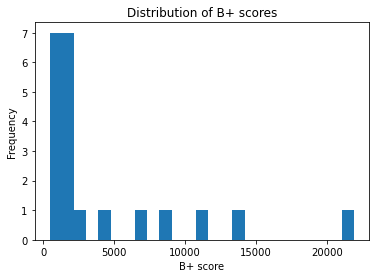

In [12]:
# Histogram that shows B+'s score distribution
ax = data['B+'].plot.hist(bins=25)

ax.set(xlabel='B+ score', 
       ylabel='Frequency',
       title='Distribution of B+ scores');

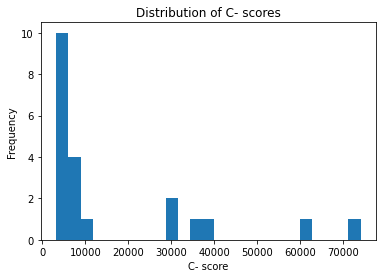

In [13]:
# Histogram that shows C-'s score distribution
ax = data['C-'].plot.hist(bins=25)

ax.set(xlabel='C- score', 
       ylabel='Frequency',
       title='Distribution of C- scores');

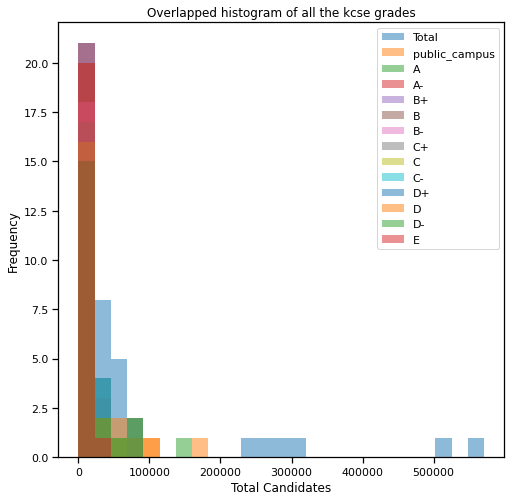

In [14]:
import seaborn as sns
sns.set_context('notebook')
ax = data.loc[:,'Total':'E'].plot.hist(bins=25, alpha=0.5,figsize=(8, 8))
ax.set_xlabel('Total Candidates')
ax.set_title('Overlapped histogram of all the kcse grades');

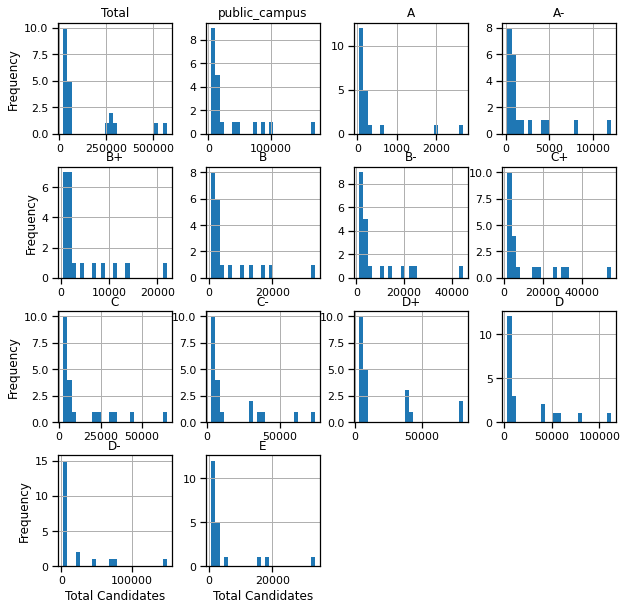

In [15]:
axList = data.loc[:,'Total':'E'].hist(bins=25, figsize=(10,10)) # Plotting histogram for all the numeric columns
for ax in axList.flatten(): # This function looks for subplots that occur in either first column or last row
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Total Candidates')
        
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Frequency')

In [16]:
# Transform from wide dataframe to a long dataframe as seaborne is picking on the type of dataframe input
gender_grades = data[["gender","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"]]
plot_data = (gender_grades
             .set_index('gender')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'score', 'level_1':'grades'})
            )

display(plot_data)

,gender,grades,score
0,FEMALE,A,58
1,FEMALE,A-,2685
2,FEMALE,B+,6581
3,FEMALE,B,10204
4,FEMALE,B-,13649
...,...,...,...
247,ALL,C-,8925
248,ALL,D+,9438
249,ALL,D,9330
250,ALL,D-,7788


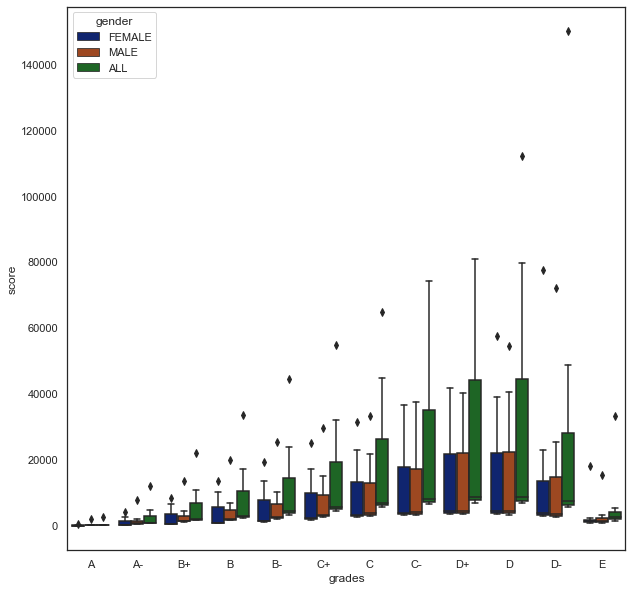

In [17]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(10,10))
sns.boxplot(x='grades', y='score', 
            hue='gender', data=plot_data);

In [18]:
gender_grades = data[["Year","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"]]
plot_data = (gender_grades
             .set_index('Year')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'score', 'level_1':'grades'})
            )

plot_data.head()

,Year,grades,score
0,2016-01-01,A,58
1,2016-01-01,A-,2685
2,2016-01-01,B+,6581
3,2016-01-01,B,10204
4,2016-01-01,B-,13649


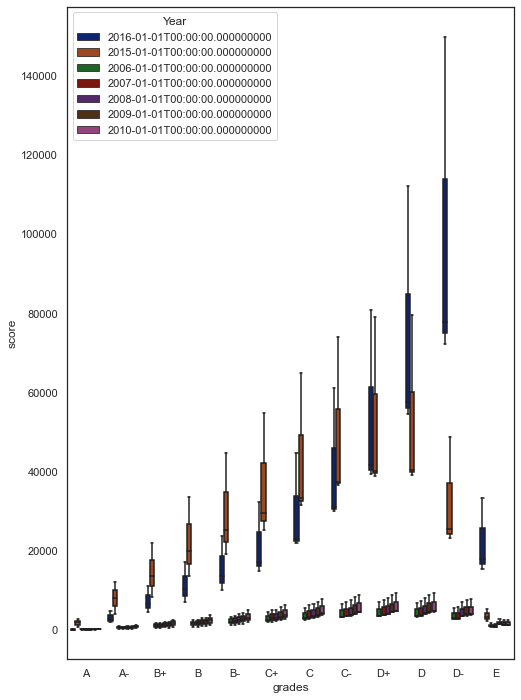

In [19]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(8,12))
sns.boxplot(x='grades', y='score', 
            hue='Year', data=plot_data);

In [20]:
campus_grades = data[['gender','public_campus']]
plot_data = (campus_grades
             .set_index('gender')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'score', 'level_1':'grades'})
            )

plot_data.head()

,gender,grades,score
0,FEMALE,public_campus,50415
1,MALE,public_campus,38514
2,ALL,public_campus,88929
3,MALE,public_campus,98187
4,FEMALE,public_campus,71305


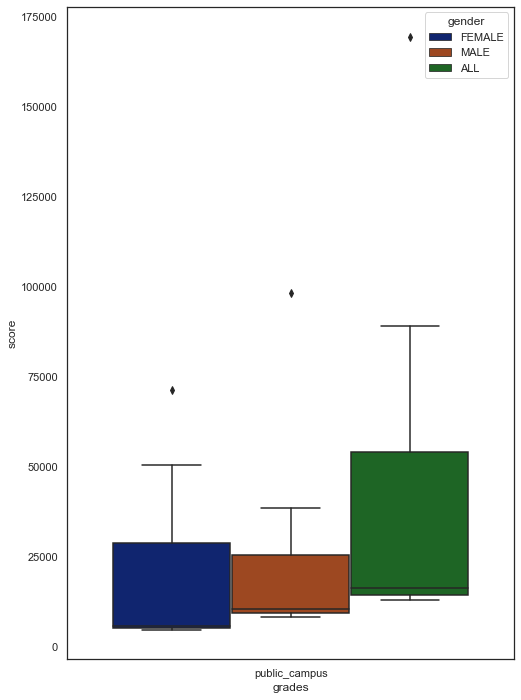

In [21]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(8,12))
sns.boxplot(x='grades', y='score', 
            hue='gender', data=plot_data);

In [22]:
campus_grades = data[['Year','public_campus']]
plot_data = (campus_grades
             .set_index('Year')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'score', 'level_1':'grades'})
            )

plot_data.head()

,Year,grades,score
0,2016-01-01,public_campus,50415
1,2016-01-01,public_campus,38514
2,2016-01-01,public_campus,88929
3,2015-01-01,public_campus,98187
4,2015-01-01,public_campus,71305


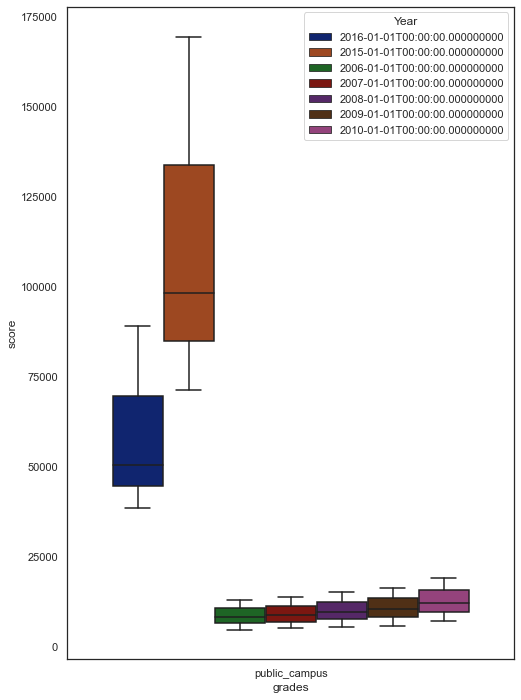

In [23]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(8,12))
sns.boxplot(x='grades', y='score', 
            hue='Year', data=plot_data);

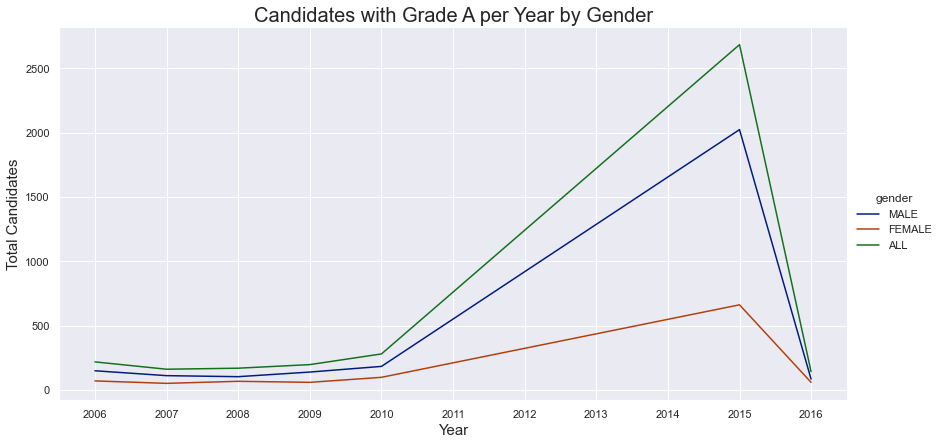

In [24]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('dark')
sns.relplot(x='Year',y='A',hue="gender",kind='line',data=data, hue_order=['MALE',"FEMALE", "ALL"],height=6,aspect=2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Candidates', fontsize=15)
plt.title('Candidates with Grade A per Year by Gender',fontsize=20)
plt.show()

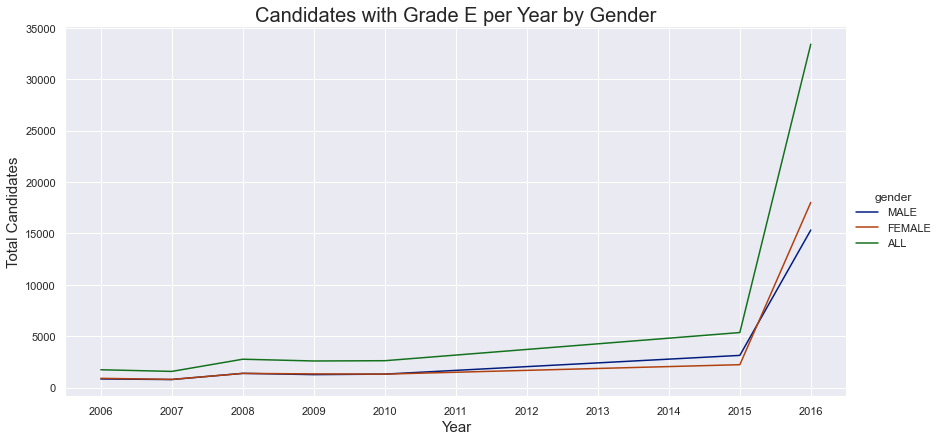

In [25]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('dark')
sns.relplot(x='Year',y='E',hue="gender",kind='line',data=data, hue_order=['MALE',"FEMALE", "ALL"],height=6,aspect=2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Candidates', fontsize=15)
plt.title('Candidates with Grade E per Year by Gender',fontsize=20)
plt.show()

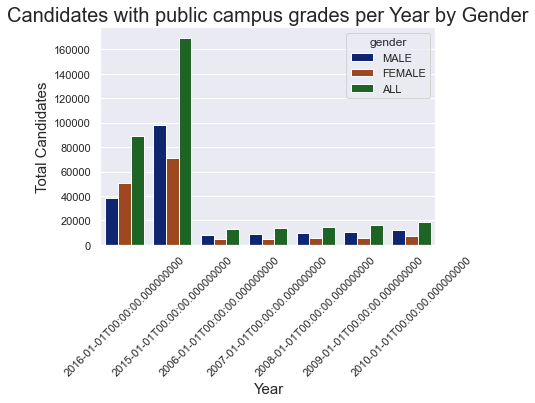

In [26]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('dark')
sns.barplot(x='Year',y='public_campus',hue="gender",data=data, hue_order=['MALE',"FEMALE", "ALL"])
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Candidates', fontsize=15)
plt.title('Candidates with public campus grades per Year by Gender',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [27]:
gender_grades = data[["gender","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","E"]]
plot_data = (gender_grades
             .set_index('gender')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'score', 'level_1':'grades'})
            )

plot_data.head()

,gender,grades,score
0,FEMALE,A,58
1,FEMALE,A-,2685
2,FEMALE,B+,6581
3,FEMALE,B,10204
4,FEMALE,B-,13649


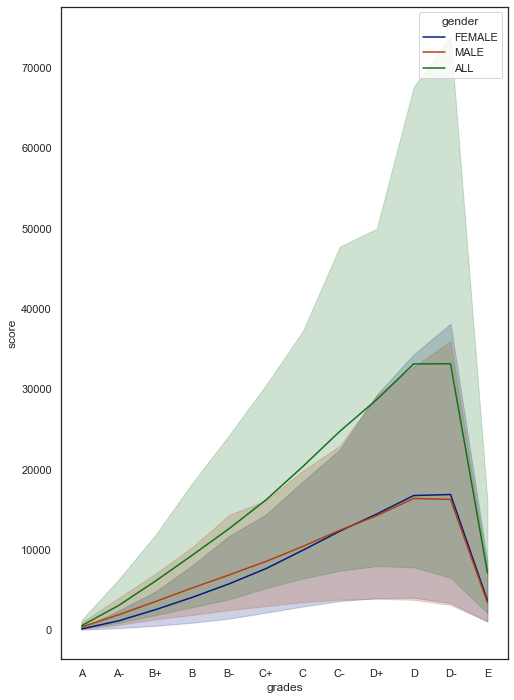

In [28]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(8,12))
sns.lineplot(x='grades', y='score', 
            hue='gender', data=plot_data);

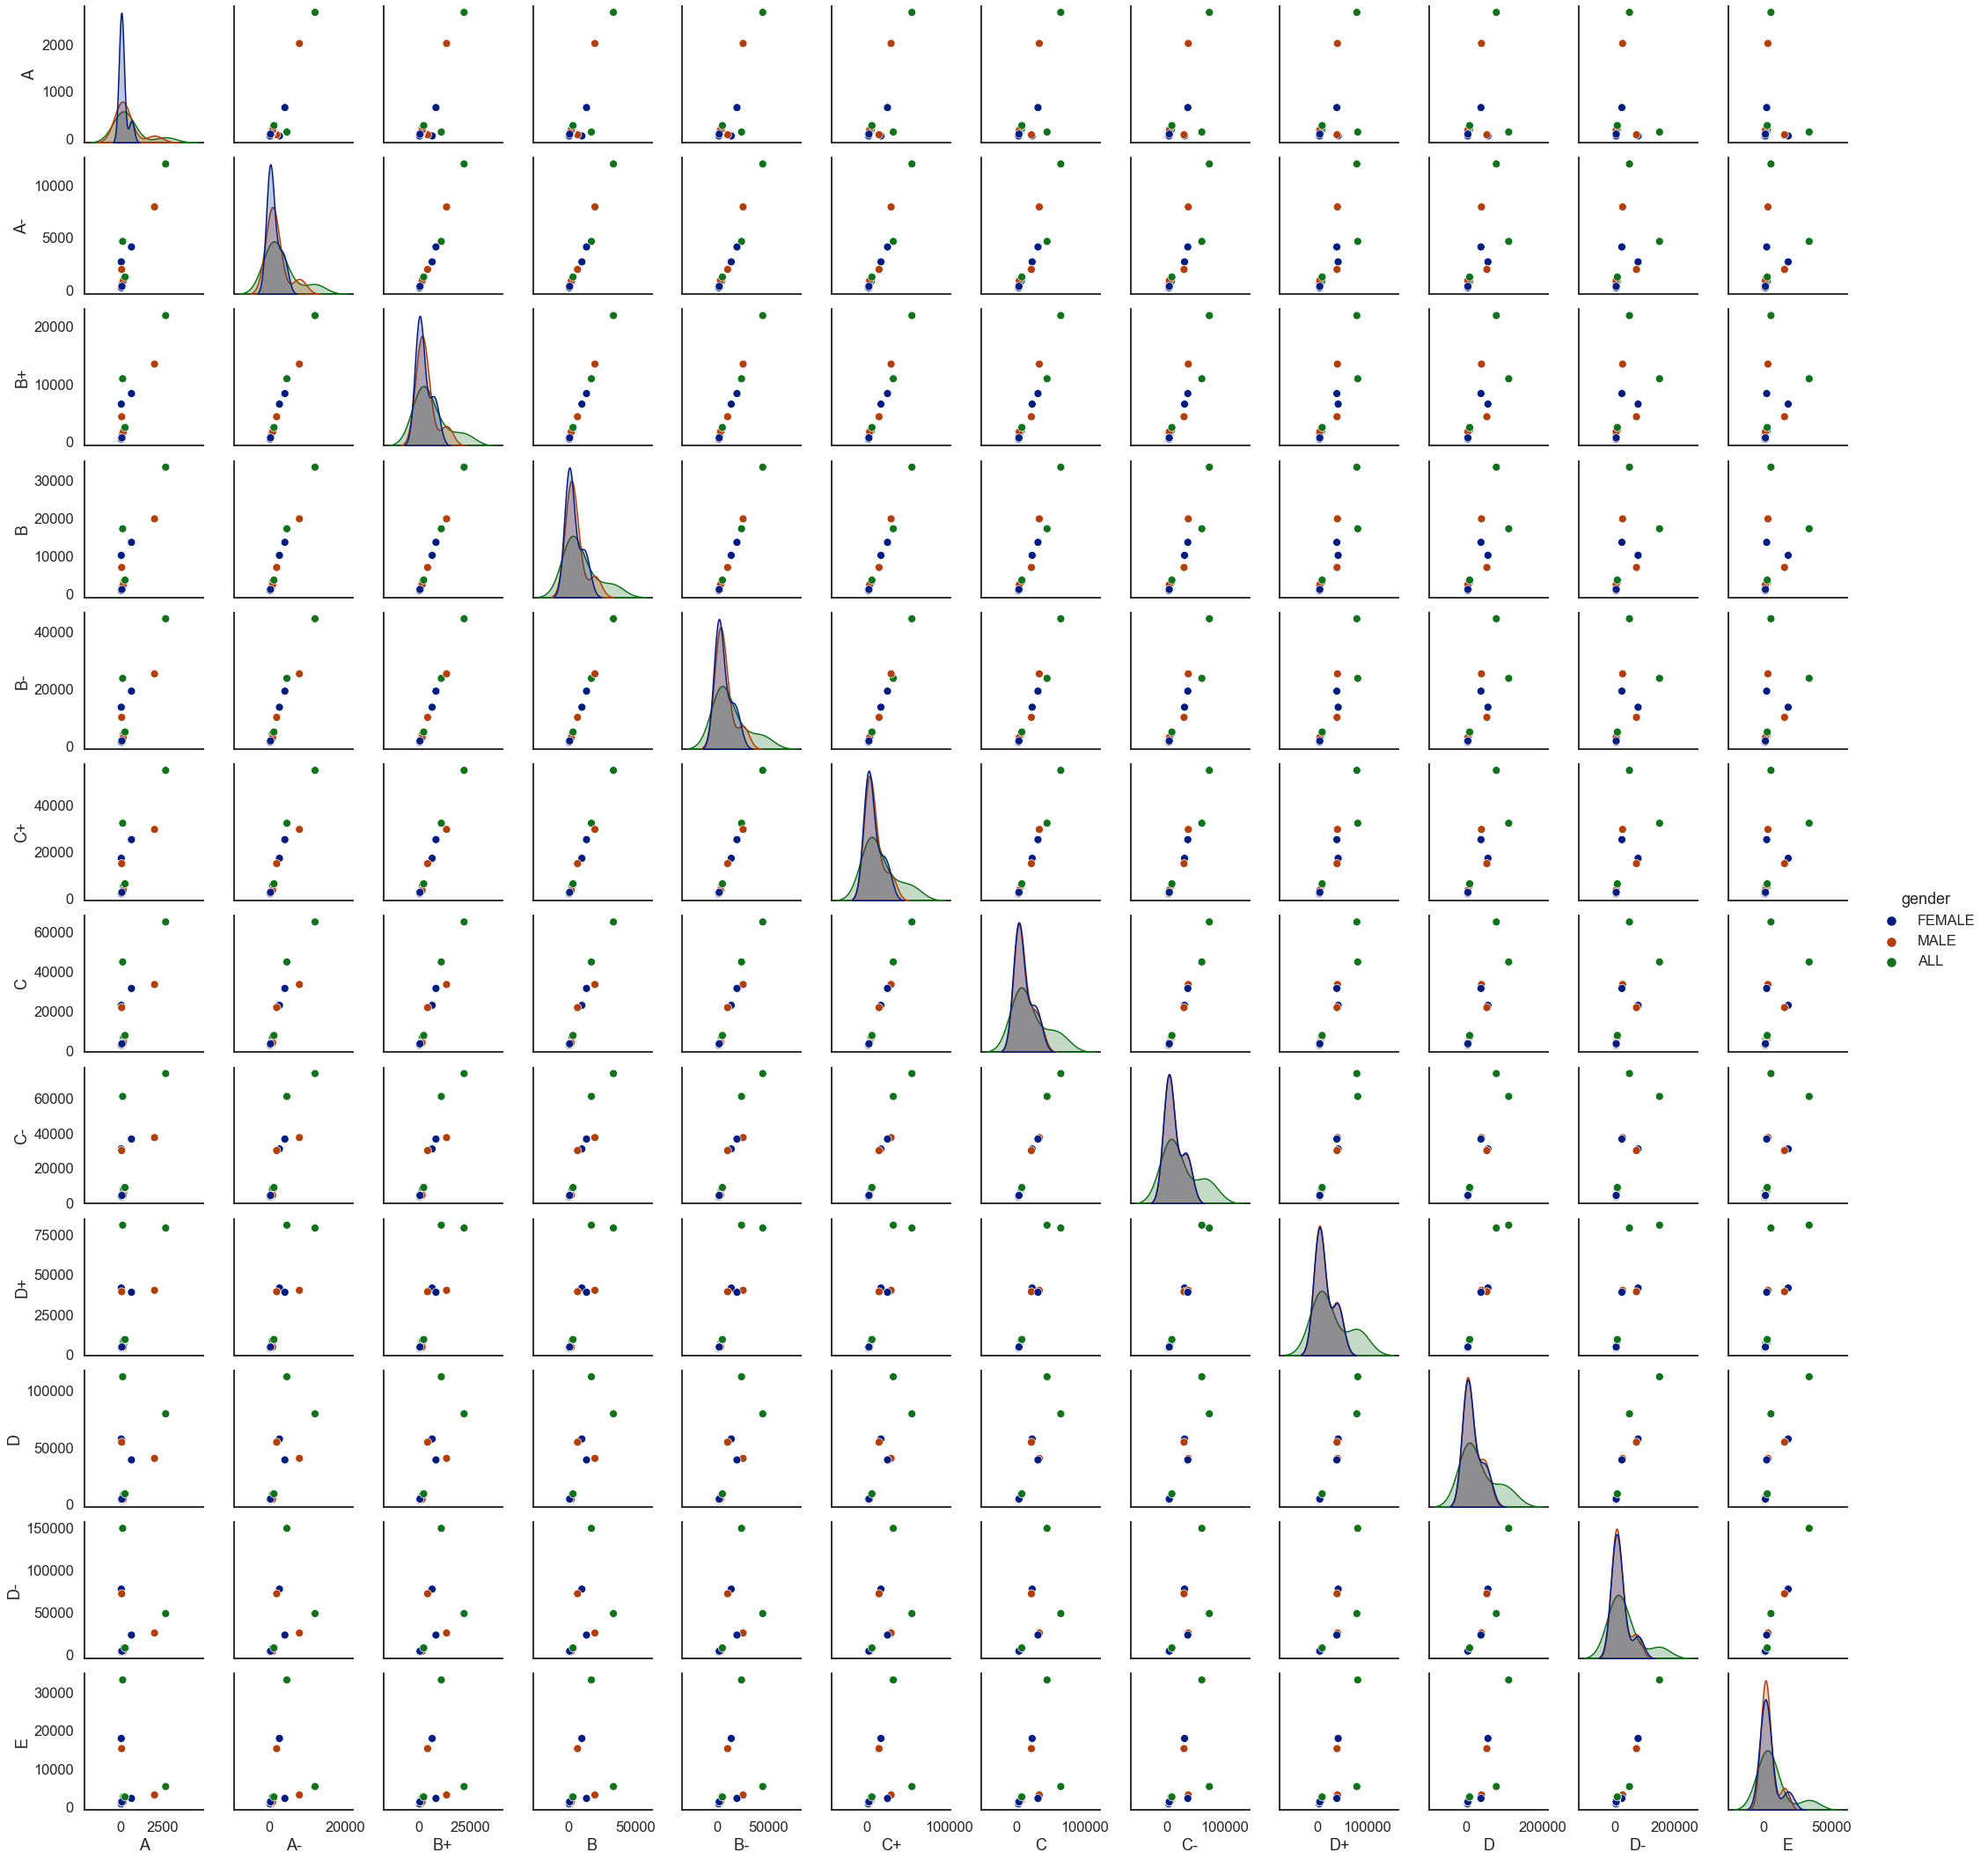

In [29]:
sns.set_context('talk')
sns.pairplot(gender_grades, hue='gender');